# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk, re, string, gensim

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cluster import KMeans

from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.pipeline import Pipeline
#from sklearn.utils.extmath import density

from time import time

stop_words = set(stopwords.words('english'))
wordnet = nltk.WordNetLemmatizer()

%matplotlib inline
sns.set()

In [2]:
train = pd.read_csv('training_data.csv')
test = pd.read_csv('testing_data_without_labels.csv')

# EDA

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13077 entries, 0 to 13076
Data columns (total 4 columns):
ID          13077 non-null int64
Country     13077 non-null object
Verbatim    13077 non-null object
Category    13077 non-null object
dtypes: int64(1), object(3)
memory usage: 408.8+ KB


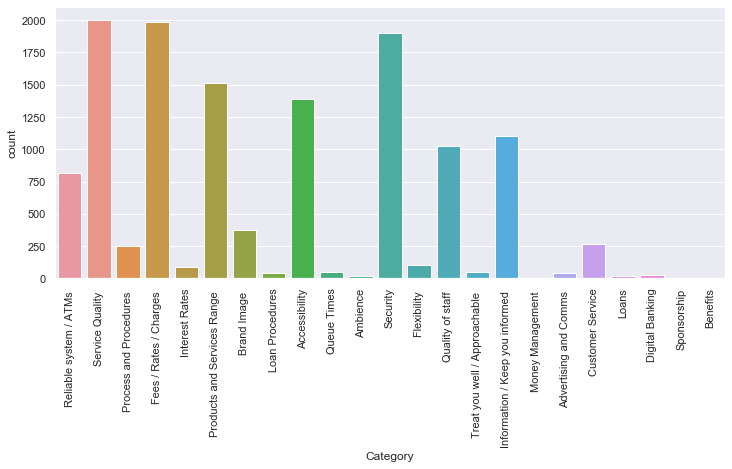

In [4]:
plt.figure(figsize=(12,5))
sns.countplot(x=train['Category'])
plt.xticks(rotation=90);

# Preprocessing

In [5]:
#removing stop words, punctuation, tokenizing and lemmatizing
def cleaner(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\s+', text)
    text = " ".join([wordnet.lemmatize(word) for word in tokens])
    return text

train['clean_text'] = train['Verbatim'].apply(lambda x: cleaner(x))

train.head()

,ID,Country,Verbatim,Category,clean_text
0,15914,A,Be able to use their technology to do transact...,Reliable system / ATMs,be able to use their technology to do transact...
1,15993,A,To be able to transfer money on internet banking.,Reliable system / ATMs,to be able to transfer money on internet banking
2,15917,A,To withdraw at the ATM anytime of the day.,Reliable system / ATMs,to withdraw at the atm anytime of the day
3,5994,E,Well currently things are okay but the issues ...,Reliable system / ATMs,well currently thing are okay but the issue ab...
4,16007,A,Quick assistance at the branch as well as the ...,Reliable system / ATMs,quick assistance at the branch a well a the at...


# Feature Extraction

In [6]:
vect_clf = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,1),stop_words='english')),
    
    ('transformer', TfidfTransformer()),
    
])

data_transformed = vect_clf.fit_transform(train['clean_text']).toarray()


data_transformed

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
data_transformed.shape

(13077, 2840)

In [8]:
vect_clf.get_params

<bound method Pipeline.get_params of Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('transformer',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True))],
         verbose=False)>

In [9]:
X = data_transformed
y = train['Category']

In [10]:
#Data Splitting

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10461, 2840)
(2616, 2840)
(10461,)
(2616,)


In [11]:
def prediction(clf):
    pred = clf.fit(X_train, y_train).predict(X_test)
    print('Accuracy score is: {:.2f}'.format(accuracy_score(pred, y_test)*100))

results = []
for clf, name in (
        (SGDClassifier(), 'SGDClassifier'),
        (LogisticRegression(max_iter=1000), "LogisticRegression"),
        (LinearSVC(),"Linear SVC"),
        (RandomForestClassifier(n_estimators=200,max_depth=50), "Random forest"),
        (MultinomialNB(), "MultiNomial NB")):
    print('=' * 30)
    print(name)
    results.append(prediction(clf))

SGDClassifier
Accuracy score is: 67.09
LogisticRegression
Accuracy score is: 68.16
Linear SVC
Accuracy score is: 66.32
Random forest
Accuracy score is: 59.59
MultiNomial NB
Accuracy score is: 62.31
